<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Assignment-Central-Difference-Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central difference

A simple improvement to the forward and backward differences is the *central difference* approach.  Central difference is similar to the forward and backward approaches, except now we use both one point before and another after the one we are interested in computing a derivative for.  To see why this works, consider the two Taylor series:

$f\left(x+h\right) = f\left(x\right)  + h \cdot f'\left(x\right) + \frac{h^2}{2} \cdot f''\left(x\right) + \frac{h^3}{3!} \cdot f'''\left(x\right)+...$

$f\left(x-h\right) = f\left(x\right)  - h \cdot f'\left(x\right) + \frac{h^2}{2} \cdot f''\left(x\right) - \frac{h^3}{3!} \cdot f'''\left(x\right)+...$

Subtracting the second equation from the first and rearranging for $f'\left(x\right)$ gives:

$f'\left(x\right) = \frac{f\left(x+h\right)-f\left(x-h\right)}{2h} - \frac{1}{3} h^2 f'''\left(x\right)+...$

This gives us an estimate for the derivative of:

$f'\left(x\right) = \frac{f\left(x+h\right)-f\left(x-h\right)}{2h}$

Which has a truncation error that is now on the order of $h^2$, not $h$.  This can lead to a significant improvement in accuracy!

## Assignment

Write a python program that implements the central, forward, and backward difference approaches.  Use this program to calculate the numerical derivative of the function 

$f\left(x\right) = \sin\left(x\right)$

at the point $x = 0.5$.

The program should have a function that compares the true derivative to the numerical one, and computes the percentage error to quantify this difference between the true and computed values:

> $error = \left.|\frac{\hat{y}_i-y_i}{y_i} \right.| \cdot 100$

where $y_i$ is the true value at a point and $\hat{y}_i$ is the estimate you are computing through numerical differentiation.  

Use this program  to calculate a range of different $h$ values, using 

$h = 2^{z}$

with z ranging from -50 to 1. For each value of $h$, compute the percent error.  Make a log/log plot of $h$ vs the percent error for all three estimates.  What value of $h$ minimizes the error for each estimate?  Which method is best to use?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Write a function for percent error.  Take as input two values, the first being the exact and the second the approximation.  Return a number.

In [ ]:
def perc_error(exact,approx):
  return np.abs((exact-approx)/exact) * 100

Loop over values of z.  In each loop, calculate two arrays, x and y, each of which have three points.  Use the central, forward, and backward difference approaches to calculate the derivative, and compare them to the exact value which you can get from calculus.  For each value of z, save the resulting percent error and $h$ to an array.  At the end, plot the error estimates on a log/log plot.  

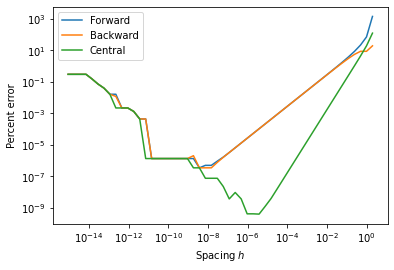

For the forward approach, the minimum error occurs for h= 3.725e-09, and has a value of 3.4864e-07
For the backward approach, the minimum error occurs for h= 3.725e-09, and has a value of 3.4864e-07
For the central approach, the minimum error occurs for h= 3.815e-06, and has a value of 4.0584e-10


In [ ]:
N = 52
h=np.zeros(N)
error_central=np.zeros(N)
error_forward=np.zeros(N)
error_backward=np.zeros(N)


for i in range(N):
  h[i]=2**(i-50)
  x = np.array([0.5-h[i],0.5, 0.5 + h[i]])
  y = np.sin(x)  
  f_prime_central = (y[2]-y[0]) / (x[2]-x[0])  #central approach
  error_central[i] = perc_error(f_prime_central,np.cos(0.5))
  f_prime_forward = (y[2]-y[1]) / (x[2]-x[1])  #forward approach
  error_forward[i] = perc_error(f_prime_forward,np.cos(0.5))
  f_prime_backward = (y[1]-y[0]) / (x[1]-x[0])  #forward approach
  error_backward[i] = perc_error(f_prime_backward,np.cos(0.5))

plt.loglog(h,error_forward,h,error_backward,h,error_central)
plt.xlabel('Spacing $h$')
plt.ylabel('Percent error')
plt.legend(["Forward","Backward","Central"])
plt.show()

print("For the forward approach, the minimum error occurs for h= %6.3e, and has a value of %6.4e"%(h[np.argmin(error_forward)],np.min(error_forward)))
print("For the backward approach, the minimum error occurs for h= %6.3e, and has a value of %6.4e"%(h[np.argmin(error_backward)],np.min(error_backward)))
print("For the central approach, the minimum error occurs for h= %6.3e, and has a value of %6.4e"%(h[np.argmin(error_central)],np.min(error_central)))

Note that you are getting three orders of magnitude better precision! And you can use a larger step size, which may be important if you are trying to compute the derivative over many points. 

Why would you use a forward or backward differences approach? For one, you may only have data in one direction.  Second, you may be stuck with data that has a large $h$ value (such as 0.1 here).  In that case, you'll get the same error whichever method you use.  When in doubt though, use the central-difference approach. 

#Grading (35 points):

* 10 points: Did you successfully write a program that calculates the forward, backward, and central difference approaches?
* 10 points: Is your program well documented and easy to read?
* 10 points: Does your program correctly calculate the percent error and show that the central difference approach has lower error at higher $h$?
* 5 points: Did you have comments that identified the central difference as the superior method? 